# Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Dataset can be used for Binary Classification sample problems

[Download the Dataset](https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data)

In [1]:
#importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
get_ipython().run_line_magic('matplotlib','inline')

In [2]:
#Loading the dataset

df1 = pd.read_csv('../../data/BankNote_Authentication.csv')

In [3]:
df1.shape

(1372, 5)

In [4]:
df1.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
#Generating descriptive statistics.
df1.describe() 

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
# Is there any Nan?
df1.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
# defining x and y
x1 = df1.drop('class', axis=1)
y1 = df1['class']

In [8]:
x1.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size =0.3, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
rfc = DecisionTreeClassifier(random_state=42)
rfc.fit(x_train1, y_train1);

In [11]:
#Predicting
y_pred_test1 = rfc.predict(x_test1)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix: ")
print(confusion_matrix(y_test1, y_pred_test1))
print()
print("-----------------------------------------------")
print()
print(classification_report(y_test1, y_pred_test1))


Confusion matrix: 
[[227   2]
 [  6 177]]

-----------------------------------------------

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       229
           1       0.99      0.97      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [14]:
# Model accuracy score
print("Accuracy:", round(metrics.accuracy_score(y_test1, y_pred_test1),3))

Accuracy: 0.981


In [17]:
#You must have GraphViz 2.38, graphviz (pip) and pydotplus to plot the tree
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

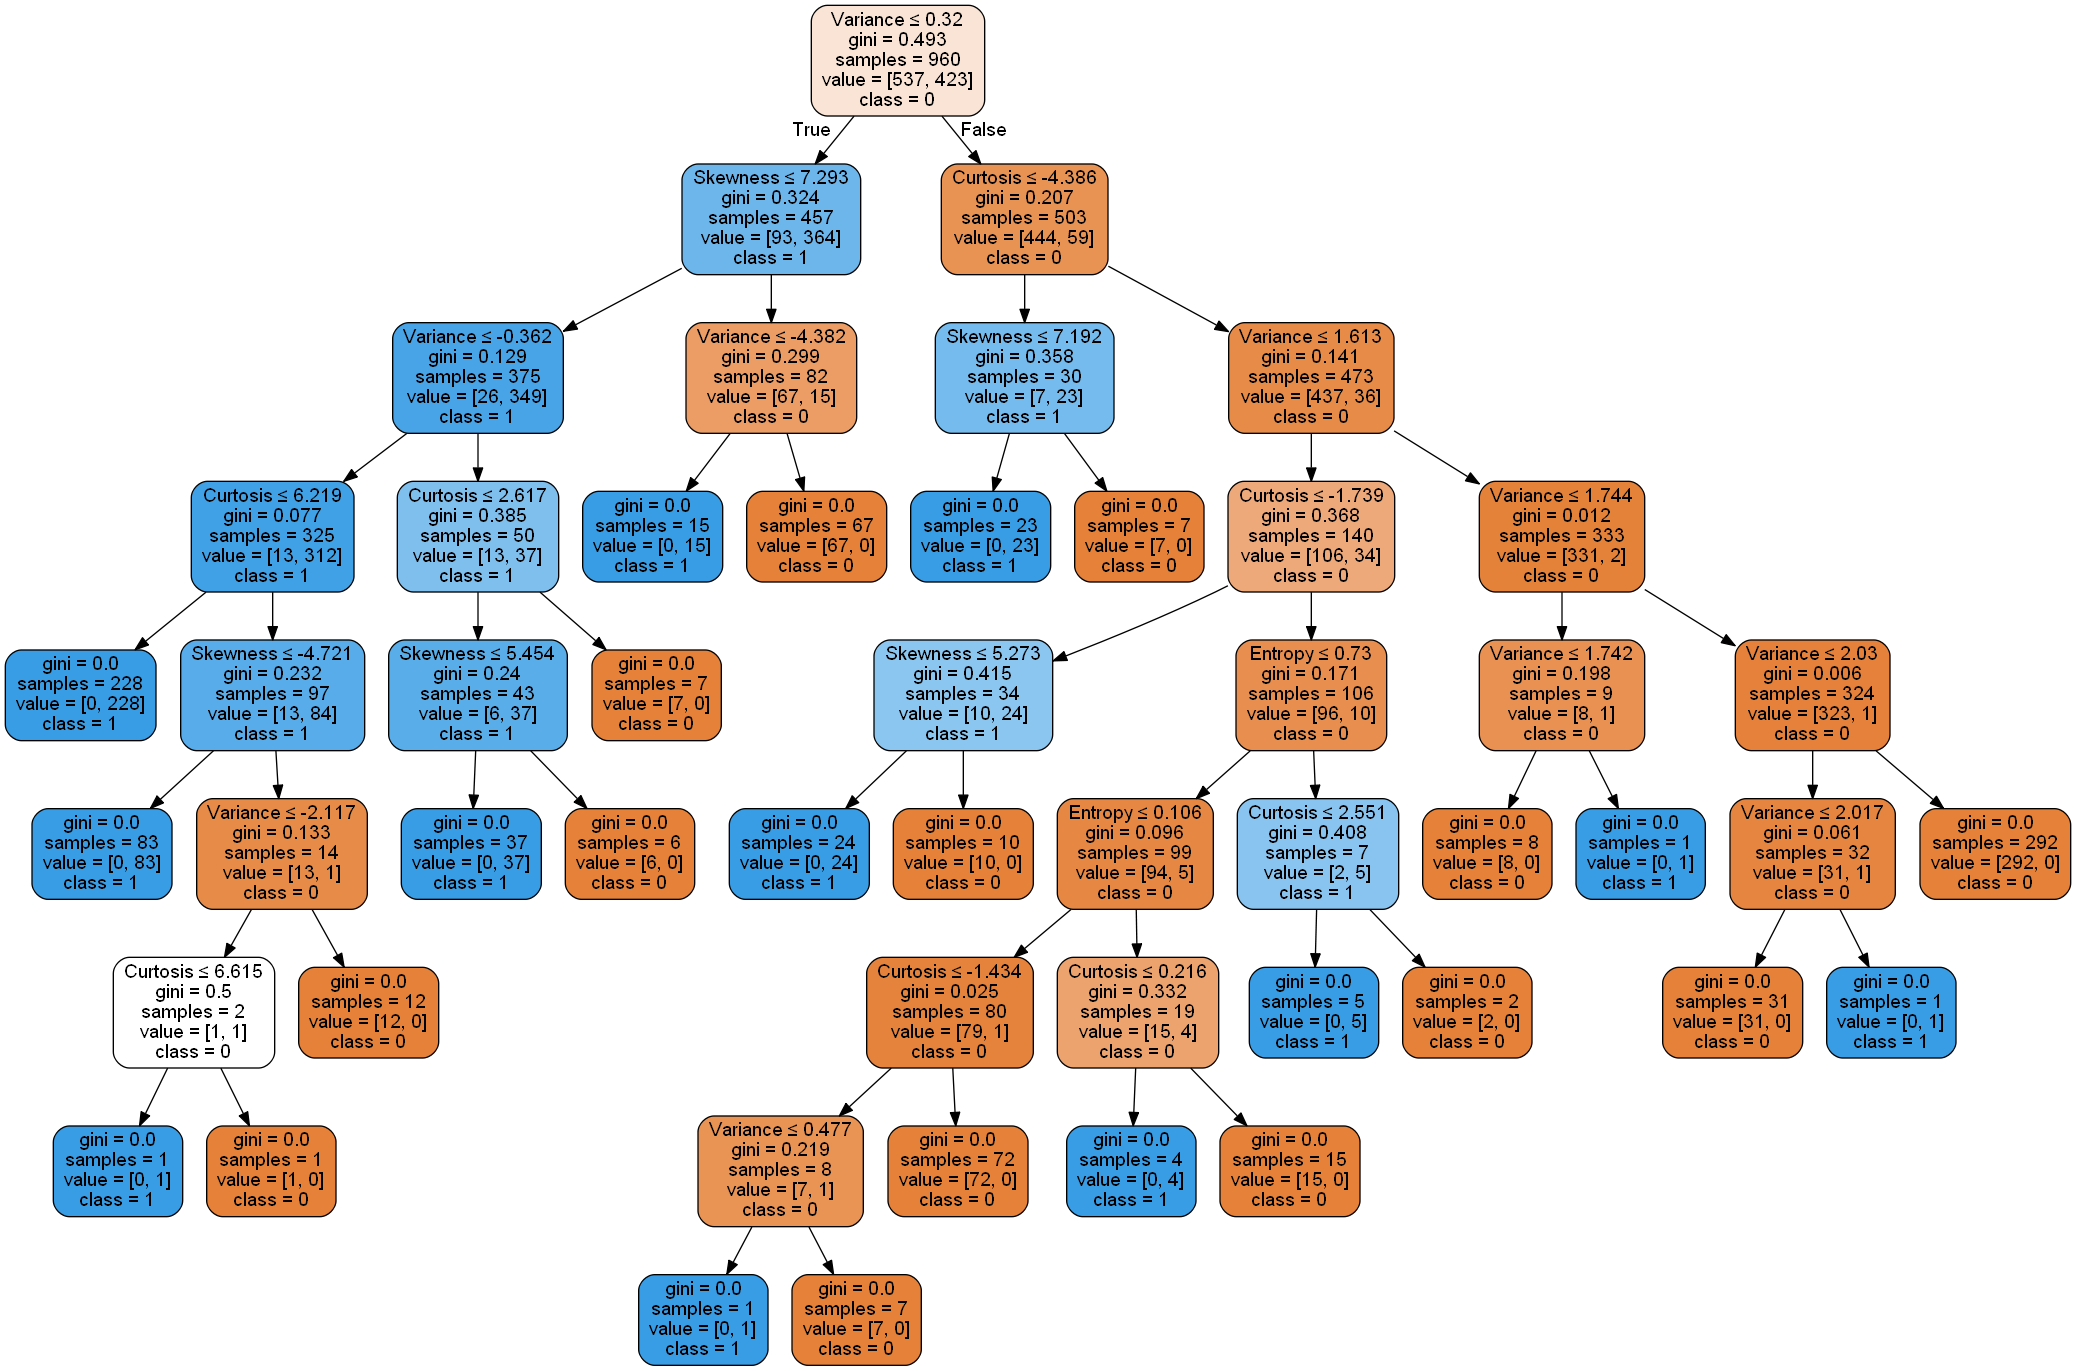

In [25]:
dot_data = StringIO()

export_graphviz(mod_arvore1,
               out_file= dot_data,
               filled=True,
               rounded=True,
               special_characters=True,
               feature_names = df1.columns[0:4],
               class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
